# Predicting and Estimating Crop Yields with Deep Learning

## Introduction

The application of deep learning techniques to train models for forecasting future outcomes are powerful and practical tools. Agriculture, a pivotal component of the global economy, necessitates a comprehensive understanding of worldwide crop yield as the human population continues to grow. This knowledge is crucial for tackling food security issues and mitigating the effects of climate change.

The prediction of crop yield stands out as a significant challenge in agriculture. Weather conditions (such as rainfall, temperature, etc.), pesticide usage, and precise historical data on crop yield play critical roles in making informed decisions related to agricultural risk management and future predictions.

For this project, we'll be using the Crop Yield Prediction Dataset to predict crop yields of the 10 most consumed crops in the world. We'll build out, tune and train different deep learning architectures such as the Convilutional Neural Network (CNN), Deep Neural Network (DNN) and Recurrent Neural Network (RNN) to predict yield, utilizing data such as pesticide use, rainfall and temperature and features in our prediction. We will progress with the hyperparameter tuning of the most appropriate deep learning model architecture and ultimate compare all of those model performances to the performance of machine learning models such as linear regression and random forest.

Furthur dataset description can be found in the Kaggle competition page https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset/data#.

## Project Structure

1. Setting Up Environment

>Import modules such as sklearn and tensorflow for our project. 

>We will be using the computer's GPU for training.
    
2. Exploratory Data Analysis (EDA)

>Combine data sets

>Visualize relationship between yield and the other predictor variables

>View summary statistics of numeric and categorical data.
   
3. Data Preprocessing

>One-hot encoding of the data

>Splitting the data into training and testing sets
   
>Normalizing and scaling our data features
   
4. Convolutional Neural Network
    
>Build, compile and train a base CNN

>Evaluate performance based on loss and r-squared
    
5. Deep Neural Network
    
>Build, compile and train a base DNN

>Evaluate performance based on loss and r-squared

6. Recurrent Neural Network
    
>Build, compile and train a base RNN

>Evaluate performance based on loss and r-squared

7. Model performance comparison

>Compare the predictive performance metrics of the deeping learning models on unseen test set
    
8. Hyperparameter tuning on a selected base deep learning model
    
>Use keras to do a random search of the best combination of hyperparameters to use in final model training
   
>Search for best filters between 32 and 256
   
>Search for best number of layers
   
>Search for best rate of drop out between 0 to 0.5
   
>Search for best Adam learning rate between 0.1 and 0.0001
   
9. Final tuned model training and prediction on unseen test set
    
>Build, compile and train model using optimal hyperparameters

>Evaluate performance based on loss and r-squared
   
10. Comparison to other Machine Learning models
    
>Compare deep learning performance to the performance from the following models: linear regression, logistic regression, knn regression, gradient boosting regression, xgboost regression and random forest.
     
11. Discussion/ Summary
    
>Reflect on the work, discuss results and what can be improved

12. Final Remarks

>Forward statements
   

## Setting up the Environment

First, we'll import the necessary libraries and modules for the project. Libraries include but not limited to packages for displaying and graphing data summaries and output, model building and model evaluations.

We will also set up our working directory path as well as set up our system GPU.

In [57]:
## Essentials
import os
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
from IPython.display import display, Image
from PIL import Image as PILImage

## Sckit learn packages for data processing machine models and model evaluation
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample, shuffle
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score

## Deep learning packages
from torchvision import transforms
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import RandomFlip, RandomZoom, RandomRotation
from tensorflow.keras.layers import Conv1D, MaxPool1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from keras.models import load_model
from keras import backend as K
import keras_tuner
from kerastuner.tuners import RandomSearch
from keras.utils import plot_model
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD, Adagrad, Adam, Nadam

Create a base direcotry path so that reading files and folders from the directory is easier:

In [58]:
current_directory = os.getcwd()
##convert forward slashes to backslashes
work_dir = current_directory.replace('\\', '/')
##print("Working Base Directory:", work_dir)

Using Deep learning with Tensor will require intensive computational resources. Therefore, to decrease the time for our model training, we will mount GPU from my system.

In [59]:
##Suppress warnings
warnings.filterwarnings("ignore")
##Check availibility og GPU
print("\nGPU Available:", tf.test.is_gpu_available())
##Check GPU device name
print(tf.test.gpu_device_name())
##Check CUDA Toolkit and cuDNN installation
print("\nCUDA Toolkit Version:", tf.test.is_built_with_cuda())
##Check tensorflow version. This version should have GPU capbilityCheck TensorFlow installation
print("\nInstalled TensorFlow Version:", tf.__version__)


GPU Available: True
/device:GPU:0

CUDA Toolkit Version: True

Installed TensorFlow Version: 2.10.1


In [60]:
##Set and use the GPU
GPU = tf.config.experimental.list_physical_devices('GPU')
if GPU:
    tf.config.experimental.set_visible_devices(GPU[0], 'GPU')
    tf.config.experimental.set_memory_growth(GPU[0], True)
    print("GPU will be used.")
else:
    print("No GPU mounted, using CPU...")

GPU will be used.


## Exploratory Data Analysis

Next we are ready to load in and explore our data set. There are a total of 5 .csv files in the folder where 4 of the datasets are split up between the one combined dataset. Therefore we will load and explore the one combined dataset "yield_df.csv".

We will continue with the following steps:
1. View our loaded dataset
2. Clean up the column names
3. Check the shape and data types
4. Assess for missing or duplicate data
5. Graph and view the numeric columns
6. Visualize the categorical columns
7. Final cleaning or column headers
8. Correlation analysis of the features

In [61]:
## Use copy paste path names from directory
yieldpath= r"\Documents\MS DS coursework\Intro to Deep Learning\Week 6\archive\yield_df.csv"
yieldpath= os.path.normpath(yieldpath)

In [62]:
df= pd.read_csv(work_dir+ yieldpath)
df.head(5)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [63]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [64]:
def clean_names(input_df):
    # Use vectorized string operations to clean headers
    clean = input_df.columns.str.lower()
    clean = clean.str.replace(' ', '_')
    clean = clean.str.replace('/', '_').str.replace(r'[^a-zA-Z0-9_]', '')
    # Assign the cleaned column names to the DataFrame
    input_df.columns = clean
    
    return input_df

In [65]:
df= clean_names(df)
df.head(5)

,unnamed:_0,area,item,year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [66]:
df.nunique()

unnamed:_0                       28242
area                               101
item                                10
year                                23
hg_ha_yield                      11514
average_rain_fall_mm_per_year      100
pesticides_tonnes                 1673
avg_temp                          1831
dtype: int64

In [67]:
df.dtypes

unnamed:_0                         int64
area                              object
item                              object
year                               int64
hg_ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

In [68]:
# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)

Missing Data:
 unnamed:_0                       0
area                             0
item                             0
year                             0
hg_ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

Duplicate Rows:
 Empty DataFrame
Columns: [unnamed:_0, area, item, year, hg_ha_yield, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp]
Index: []


There are no duplicate rows or missing values. That's good news because we can proceed to the next step.

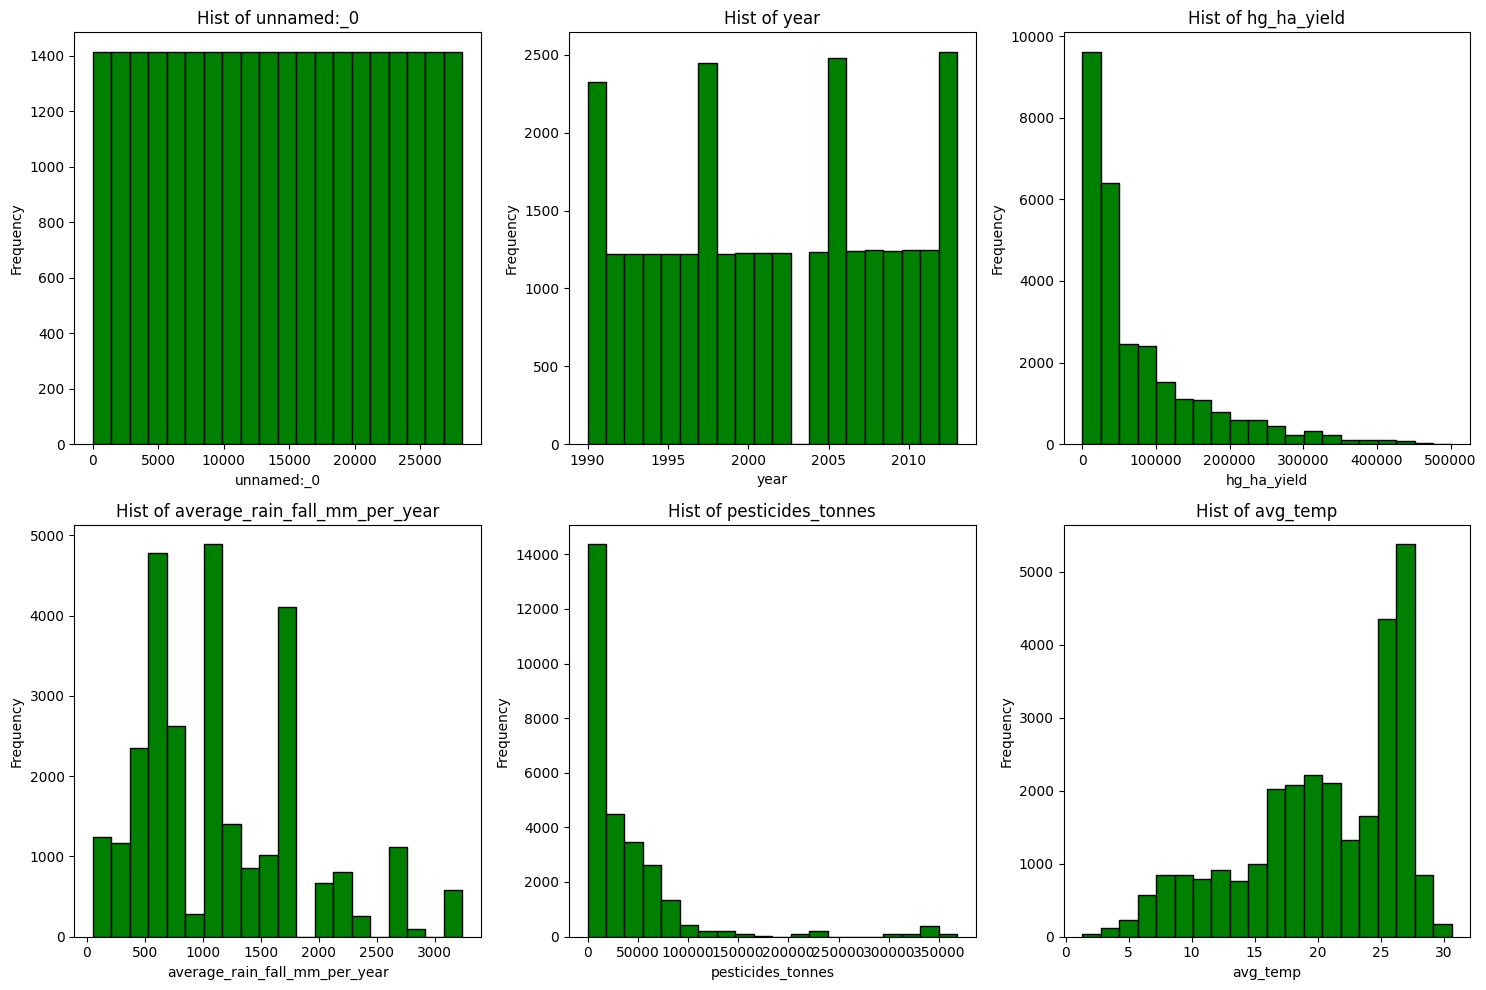

In [69]:
## Define a functino for plotting the numeric columns histogram

def plot_num_hist(df):
    ##choose only numeric columns
    numeric_columns = df.select_dtypes(include='number').columns
    
    ##calculate rows and columns for grid plot
    num_plots = len(numeric_columns)
    num_rows = math.ceil(num_plots / 3)
    num_cols = min(num_plots, 3)
    
    ##create histograms
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()
    
    ##Loop number of columns and add plot to grid
    for i, column in enumerate(numeric_columns):
        axes[i].hist(df[column], bins=20, color='green', edgecolor='black')
        axes[i].set_title(f'Hist of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
    
    ##plot adjustment
    plt.tight_layout()
    plt.show()

##Plot histograms for numeric columns
plot_num_hist(df)


The column "Year" is not the same as the rest of the numeric values as it is not discrete or continuous variables. "Year" is also not a continuous variable but it may be informative in yield prediction so we will keep it and transform it into an appropriate data type. "Unnamed:0" is just a column showing the row numbers for each row sequentially so we will not select this one for modelling. 

We'll move on to visualizing the non-numeric columns now

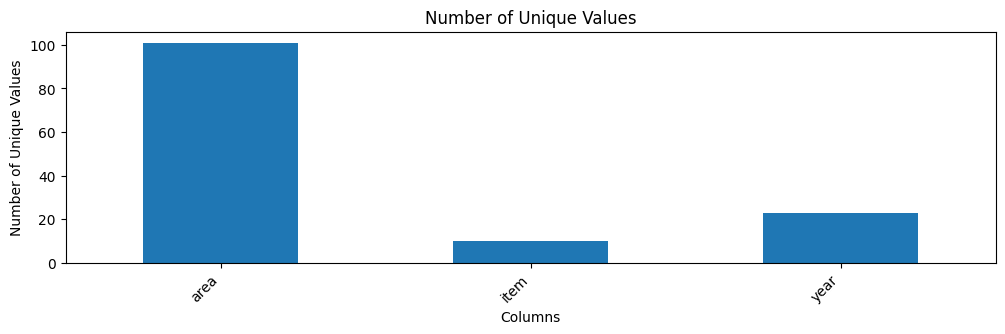

In [70]:
##Define a plot function for displauing unique values of the non-numeric data

def plot_unique_vals(df, sel_cols):
    df= df[sel_cols]
    unique_counts = df[sel_cols].nunique()
    unique_counts.plot(kind='bar', figsize=(12, 3))
    plt.title('Number of Unique Values')
    plt.xlabel('Columns')
    plt.ylabel('Number of Unique Values')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Display unique value counts and plot the graph
plot_unique_vals(df, ["area","item","year"])


Now let's take a look at the categorical or "object" data type columns. We'll first take a look at the item column. It seems to be the column with crop types. Perhaps this will give us some insight as to whether it is a big contributer to the prediction of yield.

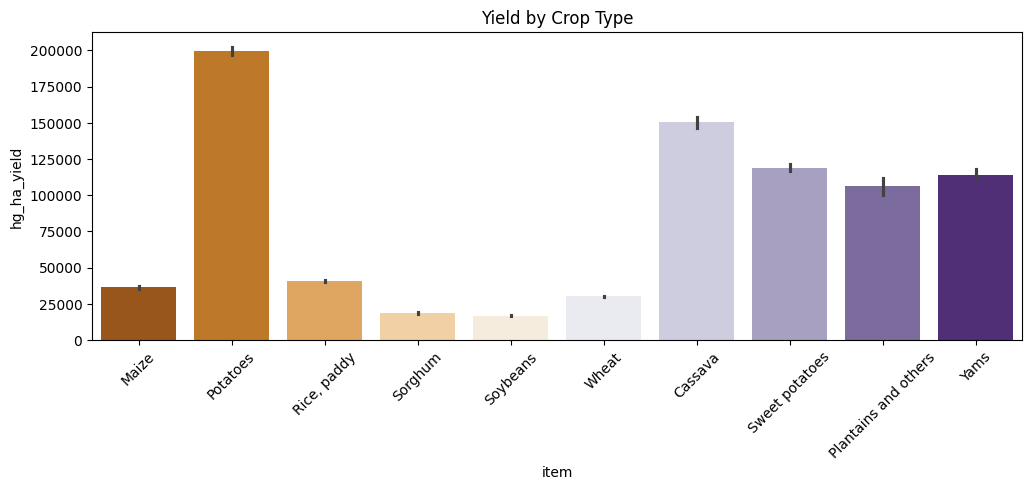

In [71]:
plt.figure(figsize=(12, 4))
sns.barplot(data=df, 
            x = df.item, 
            y = df['hg_ha_yield'],palette='PuOr')
plt.title("Yield by Crop Type")
plt.xticks(rotation=45)
plt.show()

Rooty vegetables such as potatoes, cassava and sweet potatoes have the highest yield. This is interesting as this may not necessarily be the case depending on which paricular region you are looking at in the world. 

Let's check yield by country.

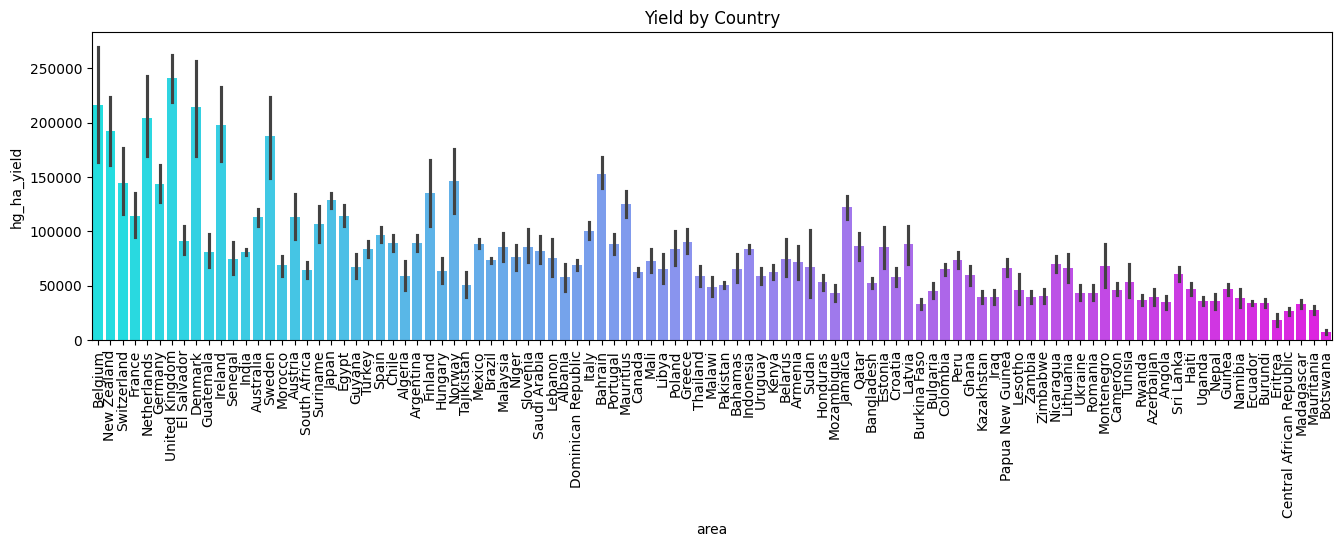

In [72]:
plt.figure(figsize=(16, 4))
# Sort the DataFrame by 'Value' in descending order
df_ord = df.sort_values(by='hg_ha_yield', ascending=False)
sns.barplot(data=df_ord, 
            x = df_ord.area, 
            y = df_ord['hg_ha_yield'],palette='cool')
plt.title("Yield by Country")
plt.xticks(rotation=90)
plt.show()

Countries Belgium, United Kingdom and Denmark are amongst the highest producers of yield for crops. This is due to those countries being heavy produces of rooty vegetables such as potatoes and cassava, which yields the highest hectagrams per hectare. 

How does yield look over time?

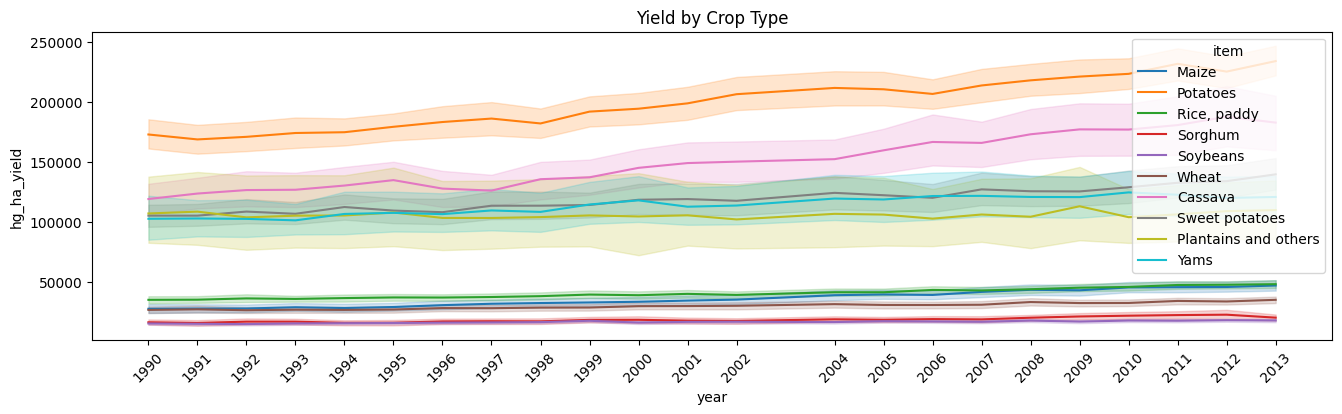

In [73]:
plt.figure(figsize=(16, 4))
ax= sns.lineplot(x = "year", 
                 y = "hg_ha_yield", 
             hue = "item", 
             data = df, 
             legend = True)

xbreaks = unique_values = df['year'].unique()
ax.set_xticks(xbreaks)

plt.title("Yield by Crop Type")
plt.xticks(rotation=45)
plt.show()

There looks to be missing data for year at 2003.
We can also see the that potatoes and Cassava, both root vegetables, are the producing the highest amounts of yield, year over year with and increasing trend. Year seems like it would be a important feature in yield prediction.

Not let's just do some final column renaming to clean up the data columns in preparation for our data preprocessing step

In [74]:
##And rename columns
df2= df[['area', 'item', "year", 'hg_ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
df2= df2.rename(columns={'item':'crop',
                        'hg_ha_yield':'yield', 
                        'average_rain_fall_mm_per_year':'rainfall', 
                        'pesticides_tonnes':'pesticide', 
                        'avg_temp':'temp'})
# df2= df2[['yield','rainfall', 'pesticide', 'temp']]

df2.head(5)


,area,crop,year,yield,rainfall,pesticide,temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       28242 non-null  object 
 1   crop       28242 non-null  object 
 2   year       28242 non-null  int64  
 3   yield      28242 non-null  int64  
 4   rainfall   28242 non-null  float64
 5   pesticide  28242 non-null  float64
 6   temp       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


Fo our last step in the EDA, it is important to assess the correlation of our variables. This could help us better select important features for our model training and gain a better understand of our model performance. 

Since we have both continuous and discrete varianles as well as non-ordinal like "year", we'll perform both a pearson's r correlaton test and a spearman's p correlation test.

Pearson is parametric test to measuure the linear relationship between two continuous variables while Spearman is a non-paramteric test that measures the monotic relationship between two variables calculated based on rank order of the data

Text(0.5, 1.0, "Spearman's p correlation")

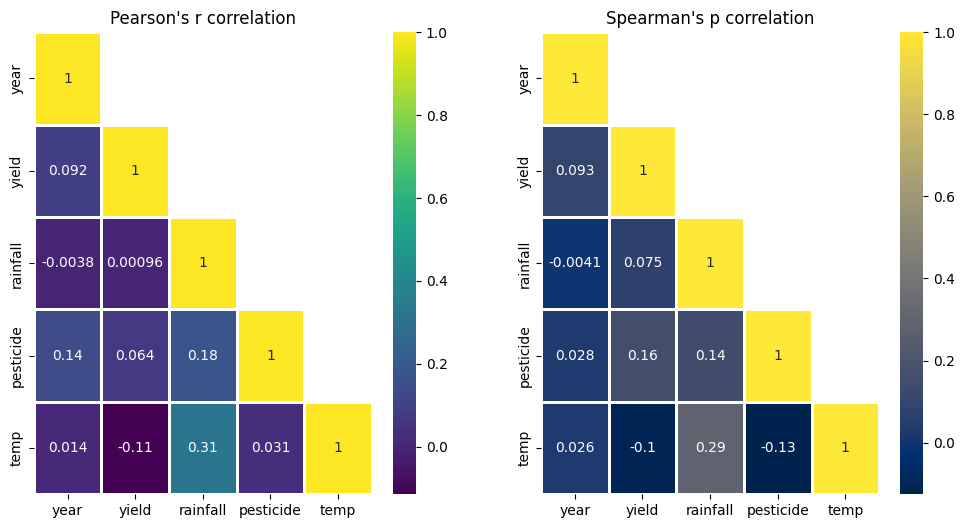

In [76]:
##Show correlation of data
##Get only numerics, not objects

corr_pears = df2.select_dtypes(['int64','float64']).corr("pearson")
corr_spear = df2.select_dtypes(['int64','float64']).corr("spearman")

##Only display bottom triangle because the same
mask1 = np.zeros_like(corr_pears, dtype=np.bool)
mask2 = np.zeros_like(corr_spear, dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True
mask2[np.triu_indices_from(mask2)] = True
mask1[np.eye(mask1.shape[0], dtype=bool)] = False
mask2[np.eye(mask2.shape[0], dtype=bool)] = False

##plt.figure(figsize=(12,8))
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(corr_pears, ##df2[["yield","rainfall","pesticide","temp"]].corr(), 
            annot=True,
            linewidth=.8,
            cmap='viridis',
            mask= mask1,
           ax=axs[0])
axs[0].set_title("Pearson's r correlation")

sns.heatmap(corr_spear, ##df2[["yield","rainfall","pesticide","temp"]].corr(), 
            annot=True,
            linewidth=.8,
            cmap='cividis',
            mask= mask2,
           ax=axs[1])
axs[1].set_title("Spearman's p correlation")
# plt.show()

Since no variables are highly correlated for either R or P tests, we will keep all variables for our dataset and proceed to the precprocessing step

## Data Prepocessing

We have non-ordinal categorical data like "area", "crop" and "year". However, that makes it challenging for us to use them as they are in our neural network models. Despite this, we can prepocress the data with one-hot encoding so that each unique category is represented in binary form. The binary vector conversion is useful because it does not create an ordinal relationship between the categories.

After this, we will split our cleaned dataset into a training set and testing set. We do not have to make a validation set at this stage because the deep learning model functions allows us to add that later.

Finally, we will use the minmaxscaler to scale and normalize our columns from 0 to 1 so that the features are in a comparable scale. 

In [77]:
## One-hot encode non-numeric columns
categorical_cols = ['area', 'crop', "year"]
numeric_cols = ['rainfall', 'pesticide', 'temp']
target_col = 'yield'

In [78]:
## Split the data into features (X) and target variable (y)
X_numeric = df2.drop(['area', 'crop', "year",'yield'], axis=1)
X_categorical = pd.get_dummies(df2[['area', 'crop', 'year']])
X = pd.concat([X_numeric, X_categorical], axis=1)
y = df2['yield'].values

##random seed
rs= 1234

##convert booleans to numeric of false= 0, and true= 1
X= X.astype(int)

##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

## Standardize the numeric features using StandardScaler
# scaler = StandardScaler()
scaler= MinMaxScaler()
# Xtrain_sc = scaler.fit_transform(X_train.iloc[:, :X_numeric.shape[1]])
# Xtest_sc = scaler.transform(X_test.iloc[:, :X_numeric.shape[1]])
Xtrain_sc = scaler.fit_transform(X_train)
Xtest_sc = scaler.transform(X_test)

Now let's check the details of the processed and transformed datasets to see if they are in the correct structure

In [79]:
len(X_train)

22593

In [80]:
X_train.values

array([[  250, 13535,     6, ...,     0,     0,     0],
       [  636, 27852,    17, ...,     0,     0,     0],
       [ 2274,  1302,    22, ...,     0,     0,     0],
       ...,
       [  534, 26651,    16, ...,     0,     0,     0],
       [  636, 31244,    12, ...,     1,     0,     0],
       [  565, 28832,     7, ...,     0,     0,     0]])

In [81]:
Xtrain_sc.shape

(22593, 115)

In [82]:
Xtest_sc.shape

(5649, 115)

In [83]:
Xtrain_sc

array([[0.06240201, 0.03680209, 0.17241379, ..., 0.        , 0.        ,
        0.        ],
       [0.18344309, 0.07573047, 0.55172414, ..., 0.        , 0.        ,
        0.        ],
       [0.69708373, 0.00354018, 0.72413793, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.15145814, 0.07246491, 0.51724138, ..., 0.        , 0.        ,
        0.        ],
       [0.18344309, 0.08495342, 0.37931034, ..., 1.        , 0.        ,
        0.        ],
       [0.16117905, 0.07839512, 0.20689655, ..., 0.        , 0.        ,
        0.        ]])

## Convolutional Neural Network

For our first model architecture, we will use Convolutional Neural Network or CNN. CNNs are good for tasks where spatial information is important such as image data. If the dataset consists of a sequential structure or related neighboring datapoints, CNNs can capture those patterns effectively. Given this information, there may be better suited deep learning models for our prediction task but for educational purposes, we we try out a CNN model and see how it works.

We'll build our base CNN model with the following architecture:
1. A Conv1D layer with 32 filters and a size of 3 with the data's input shape of (115,1). The activation is RELU or "recitified Linear Unit which is applied to introduce non-linearity.
2. A maxpooling layer after the conv layer to down-sample the spatial dims of the input volume
3. A flatten layer to flatten data into one dimenisonal array to prepare for fully connect layers
4. A fully connected layer with 64 naurons and RELU activation function
5. The last output layer with a single neuron for regression

Next, we will compile the model with the following:
1. Adam optimizer: sutiable for many tasks. combines RMSprop and Momentum and adpats learning rates for indivudal parameters
2. Begin with high learning rate or 0.1 because we will be running the entire dataset for each epoch
3. Loss metric of mean squared error as well as r-squared ((coeeficient of determination)

And then we'll fit the model with the following:
1. Model checkpoint to save our best model during training
2. Early stop at after no changes in performance after 5 iterations through the dataset
3. Reduce learning rate by factor of 0.1 to a minimum of 0.0001 if model performance as determined by our validation loss does not improve after 3 passes.

Lastly, we will evaluate the loss and r-squared for the training and validation sets

In [84]:
## Define the r2 metric to be displayed in the model history
## R-squared coefficient of determination measures accruacy of predicted values vs actual values

def rsq(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [3]:
cnn = Sequential([
#     Conv1D(32, 3, activation='relu', input_shape=(Xtrain_sc.shape[1], 1)),
    Conv1D(32, 3, activation='relu', input_shape=(115, 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

In [30]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1),
          loss='mean_squared_error', metrics=['mse', rsq])
#           loss='mean_absolute_error', metrics=['mae', r_squared])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 113, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 56, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dense (Dense)               (None, 64)                114752    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 114,945
Trainable params: 114,945
Non-trainable params: 0
__________________________________________________

In [31]:
# Save the best model during training
cnn_checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True)

##Include callbacks for model fit
cnn_early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5, 
                           restore_best_weights=True)
cnn_reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=3, 
                              min_lr=0.00001)

cnn_history = cnn.fit(Xtrain_sc, 
#                       X_train.astype(int).values, 
                      y_train, 
                      validation_split=0.2, 
#     validation_data= [X_test.astype(int).values, y_test], 
                            epochs=10,
                            callbacks=[cnn_checkpoint,
                                      cnn_early_stop,
                                      cnn_reduce_lr])

Epoch 1/10
565/565 [==============================] - 8s 5ms/step - loss: 2973809152.0000 - mse: 2973809152.0000 - rsq: 0.5647 - val_loss: 1224984704.0000 - val_mse: 1224984704.0000 - val_rsq: 0.8165 - lr: 0.1000
Epoch 2/10
565/565 [==============================] - 2s 3ms/step - loss: 754505216.0000 - mse: 754505216.0000 - rsq: 0.8856 - val_loss: 557336960.0000 - val_mse: 557336960.0000 - val_rsq: 0.9091 - lr: 0.1000
Epoch 3/10
565/565 [==============================] - 2s 4ms/step - loss: 547119104.0000 - mse: 547119104.0000 - rsq: 0.9122 - val_loss: 528713408.0000 - val_mse: 528713408.0000 - val_rsq: 0.9151 - lr: 0.1000
Epoch 4/10
565/565 [==============================] - 2s 4ms/step - loss: 449525952.0000 - mse: 449525952.0000 - rsq: 0.9288 - val_loss: 473994400.0000 - val_mse: 473994400.0000 - val_rsq: 0.9203 - lr: 0.1000
Epoch 5/10
565/565 [==============================] - 2s 3ms/step - loss: 410519744.0000 - mse: 410519744.0000 - rsq: 0.9357 - val_loss: 365650432.0000 - val_ms

Text(0.5, 1.0, 'Convolutional NN R squared')

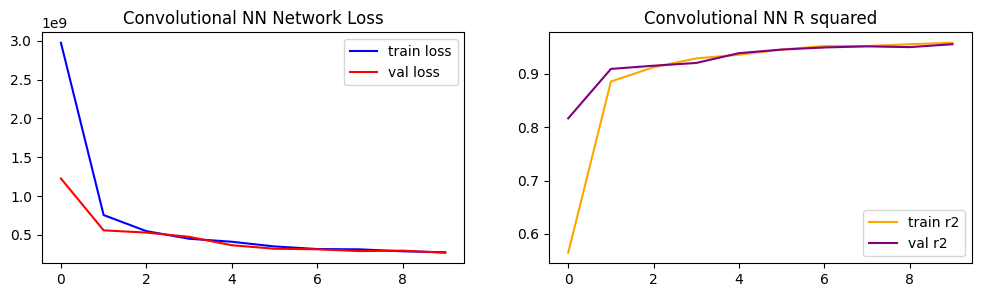

In [32]:
# Plotting training and validation loss and accuracy
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='train loss', color= "blue")
plt.plot(cnn_history.history['val_loss'], label='val loss', color="red")
plt.legend()
plt.title('Convolutional NN Network Loss')

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['rsq'], label='train r2', color= "orange")
plt.plot(cnn_history.history['val_rsq'], label='val r2', color= "purple")
plt.legend()
plt.title('Convolutional NN R squared')

After the completeion of 10 epochs it looks like our base CNN did a really good job in predicting the yield values without over or underfitting. Being a deep learning model, it is not suprising that it performs well. The model can we built upon in many different ways to achieve a better outcome. Let's see how it compares to other deep learning models such as the DNN (Deep Neural Network) and RNN (Recurrent Neural Network).

## Deep Neural Network

For our second model architecture, we will use the Deep Neural Network or DNN. DNNs are versatile and suited for a whide range of data types including tabular data where spatial or sequential data may be lacking. DNNs are great for data that are very complex because it's innate deep architecture, hence the name. Given this information, a DNN might be our go-to method depending on how it ultimately performs.

We'll build our base CNN model with the following architecture:
1. A Dense layer with 128 filters and a size of 3 with the data's input shape of (115,). The activation is RELU or "recitified Linear Unit which is applied to introduce non-linearity.
2. Another dense layer with 64 filters and same activation
3. A third dense layer with 32 filters and same activation
4. The last output layer with a single neuron for regression

The rest of the model compilation, fitting, and performance evualtions steps are the same as what we did for the RNN model.

In [33]:
dnn = Sequential([
    Dense(128, activation='relu', input_shape=(115,)),
    Dense(64, activation='relu'),## input_shape=(115,)),
    Dense(32, activation='relu'),
## output for regression layer
    Dense(1)  
])

dnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1),
          loss='mean_squared_error', metrics=['mse', rsq])
#           loss='mean_absolute_error', metrics=['mae', r_squared])

dnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               14848     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 25,217
Trainable params: 25,217
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Save the best model during training
dnn_checkpoint = ModelCheckpoint('best_dnn_model.h5', save_best_only=True)
##Include callbacks for model fit
dnn_early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5, 
                           restore_best_weights=True)
dnn_reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=3, 
                              min_lr=0.0001)

dnn_history = dnn.fit(Xtrain_sc, 
                            y_train, 
                            validation_split= 0.2, 
                            epochs=10, 
                            callbacks=[dnn_checkpoint,
                                      dnn_early_stop,
                                      dnn_reduce_lr])

Epoch 1/10
565/565 [==============================] - 3s 4ms/step - loss: 1202237824.0000 - mse: 1202237824.0000 - rsq: 0.8206 - val_loss: 443672032.0000 - val_mse: 443672032.0000 - val_rsq: 0.9276 - lr: 0.1000
Epoch 2/10
565/565 [==============================] - 2s 4ms/step - loss: 429979008.0000 - mse: 429979008.0000 - rsq: 0.9334 - val_loss: 384880032.0000 - val_mse: 384880032.0000 - val_rsq: 0.9378 - lr: 0.1000
Epoch 3/10
565/565 [==============================] - 2s 4ms/step - loss: 364675808.0000 - mse: 364675808.0000 - rsq: 0.9443 - val_loss: 326001312.0000 - val_mse: 326001312.0000 - val_rsq: 0.9475 - lr: 0.1000
Epoch 4/10
565/565 [==============================] - 2s 4ms/step - loss: 324260384.0000 - mse: 324260384.0000 - rsq: 0.9514 - val_loss: 271996992.0000 - val_mse: 271996992.0000 - val_rsq: 0.9547 - lr: 0.1000
Epoch 5/10
565/565 [==============================] - 2s 4ms/step - loss: 318209984.0000 - mse: 318209984.0000 - rsq: 0.9513 - val_loss: 307831872.0000 - val_mse:

Text(0.5, 1.0, 'Deep NN R squared')

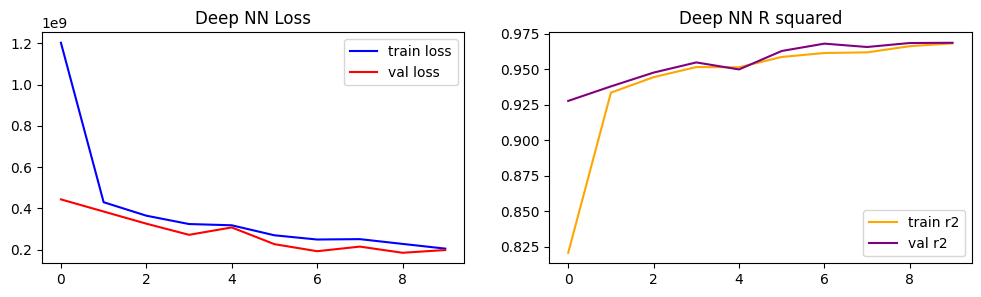

In [35]:
# Plotting training and validation loss and accuracy
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
plt.plot(dnn_history.history['loss'], label='train loss', color= "blue")
plt.plot(dnn_history.history['val_loss'], label='val loss', color="red")
plt.legend()
plt.title('Deep NN Loss')

plt.subplot(1, 2, 2)
plt.plot(dnn_history.history['rsq'], label='train r2', color= "orange")
plt.plot(dnn_history.history['val_rsq'], label='val r2', color= "purple")
plt.legend()
plt.title('Deep NN R squared')

This one is rather interesting because after the just 10 epochs, it looks like our base DNN is starting to converge to a gloabl minimum yet still yield low loss and r-squared for both training and validation sets. This may be the case because you can see more bouncing around of the loss and r2 steps compared to the RNN. It'd be interesting to see how a tuned model would look especially because the DNN is describe to be the type model architecutre that would work well for our prediction task. Finally, let's assess the RNN (Recurrent Neural Network).

## Recurrent Neural Network

For our third model architecture, we will use the Recurrent Neural Network or RNN. RNNs by design, are very useful for sequential data of data where the order input matters. This includes but not limited to, data for time series prediction and Natural language Processing. According to this description, RNN may not be the best deep learning model for our task but again, for the sake or learning, we will see how it compares to CNN and DNN.

We'll build our base CNN model with the following architecture:
1. The first layer is a Simple RNN layer with 32 neurons. It processes sequences by iterating through the input sequence elements and maintaining a state. The activation is RELU or "recitified Linear Unit which is applied to introduce non-linearity.
2. Another dense layer with 64 filters and same activation for more abstraction and complexity to learn from.
3. The last output layer with a single neuron for predicting continuous output. Using defualt linear activation.

The rest of the model compilation, fitting, and performance evualtions steps are the same as what we did for the CNN and DNN models.

In [36]:
rnn = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(115, 1)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

rnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1),
          loss='mean_squared_error', metrics=['mse', rsq])
#           loss='mean_absolute_error', metrics=['mae', r_squared])

rnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Save the best model during training
rnn_checkpoint = ModelCheckpoint('best_rnn_model.h5', save_best_only=True)
##Include callbacks for model fit
rnn_early_stop = EarlyStopping(monitor='val_loss', 
                          patience=5, 
                           restore_best_weights=True)
rnn_reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=3, 
                              min_lr=0.0001)

rnn_history = dnn.fit(Xtrain_sc, 
                            y_train, 
                            validation_split= 0.2, 
                            epochs=10, 
                           ##batch_size= 8,
                            callbacks=[rnn_checkpoint,
                                      rnn_early_stop,
                                      rnn_reduce_lr])

Epoch 1/10
565/565 [==============================] - 2s 4ms/step - loss: 208250320.0000 - mse: 208250320.0000 - rsq: 0.9689 - val_loss: 170048848.0000 - val_mse: 170048848.0000 - val_rsq: 0.9720 - lr: 0.1000
Epoch 2/10
565/565 [==============================] - 2s 4ms/step - loss: 191792384.0000 - mse: 191792384.0000 - rsq: 0.9705 - val_loss: 263250704.0000 - val_mse: 263250704.0000 - val_rsq: 0.9561 - lr: 0.1000
Epoch 3/10
565/565 [==============================] - 2s 4ms/step - loss: 199008912.0000 - mse: 199008912.0000 - rsq: 0.9698 - val_loss: 190293328.0000 - val_mse: 190293328.0000 - val_rsq: 0.9702 - lr: 0.1000
Epoch 4/10
565/565 [==============================] - 2s 4ms/step - loss: 184771584.0000 - mse: 184771584.0000 - rsq: 0.9713 - val_loss: 154267872.0000 - val_mse: 154267872.0000 - val_rsq: 0.9749 - lr: 0.1000
Epoch 5/10
565/565 [==============================] - 2s 4ms/step - loss: 175381872.0000 - mse: 175381872.0000 - rsq: 0.9727 - val_loss: 152919680.0000 - val_mse: 1

Text(0.5, 1.0, 'Recurrent NN R squared')

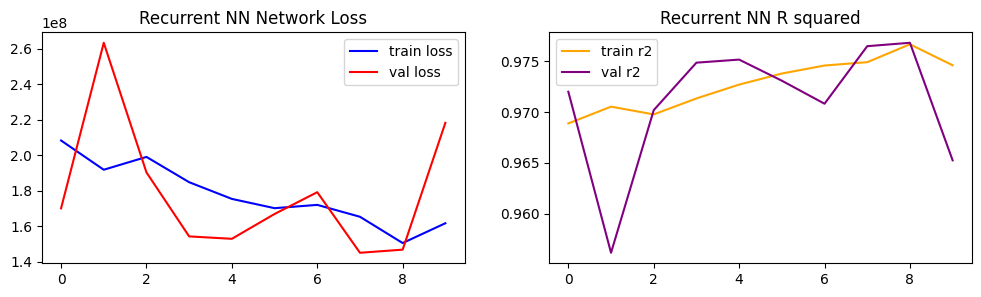

In [38]:
# Plotting training and validation loss and accuracy
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['loss'], label='train loss', color= "blue")
plt.plot(rnn_history.history['val_loss'], label='val loss', color="red")
plt.legend()
plt.title('Recurrent NN Network Loss')

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['rsq'], label='train r2', color= "orange")
plt.plot(rnn_history.history['val_rsq'], label='val r2', color= "purple")
plt.legend()
plt.title('Recurrent NN R squared')

The history from this model looks a little different from the CNN's and DNN's history. The loss is less at 1e8 compared to the other two model's 1e9. Also it looks like the model converges to a minimum much quicker than CNN and DNN, reaching a validaition  accuracy above 0.970 in just two epochs. However the gradient seems to be much less stable for RNN than CNN or DNN because the loss and r-squared lines overlap several times.

## Model Performance Comparison

Now lets compare predictive performance of the CNN, DNN and RNN models on the unseen test set. The mean_squared_error and r-squared will be compared.

In [39]:
# def rsq(y_true, y_pred):
#     SS_res =  K.sum(K.square(y_true - y_pred)) 
#     SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
#     return 1 - SS_res/(SS_tot + K.epsilon())

In [85]:
##Need to define a custom object later for rsq because not native to keras model
cust = {'rsq': rsq}

##Load the best models for each
bestcnnpath= work_dir+'/best_cnn_model.h5'
bestdnnpath= work_dir+'/best_dnn_model.h5'
bestrnnpath= work_dir+'/best_rnn_model.h5'

bestcnn= load_model(bestcnnpath, custom_objects=cust)
bestdnn= load_model(bestdnnpath, custom_objects=cust)
bestrnn= load_model(bestrnnpath, custom_objects=cust)

In [86]:
##Compare performance of models
cnn_predictions = bestcnn.predict(Xtest_sc)
dnn_predictions = bestdnn.predict(Xtest_sc)
rnn_predictions = bestrnn.predict(Xtest_sc)

cnn_mse = mean_squared_error(y_test, cnn_predictions)
dnn_mse = mean_squared_error(y_test, dnn_predictions)
rnn_mse = mean_squared_error(y_test, rnn_predictions)

cnn_rsq = r2_score(y_test, cnn_predictions)
dnn_rsq = r2_score(y_test, dnn_predictions)
rnn_rsq = r2_score(y_test, rnn_predictions)

print(f'Mean Squared Error (CNN): {cnn_mse}')
print(f'Mean Squared Error (DNN): {dnn_mse}')
print(f'Mean Squared Error (RNN): {rnn_mse}')
print(f'R_squared (CNN): {round(cnn_rsq,4)}')
print(f'R_squared (DNN): {round(dnn_rsq,4)}')
print(f'R_squared (RNN): {round(rnn_rsq,4)}')

177/177 [==============================] - 0s 925us/step
Mean Squared Error (CNN): 257149287.11623612
Mean Squared Error (DNN): 195975768.1491566
Mean Squared Error (RNN): 155900308.53059205
R_squared (CNN): 0.9637
R_squared (DNN): 0.9724
R_squared (RNN): 0.978


It is apparent that all models do an outstanding job predicting the unseen test dataset. My attention is drawn towards the DNN because although the loss and r-squared for the test set prediction is between the two other models, it didn't seem to have enough epochs to allow it to converge to a gloabl minimum. Given that you can go deeper with the model architecture using a DNN for our model prediction task, we will tune and see if we can improve this model to be better than the other prior models.

## Final Tuned Model Training and Prediction on Unseen Test Set

In [42]:
## Function for tunning DNN
def tune_dnn(hp):
    inp_shp= (115, )
    model = Sequential()
    
    ## Input layer
    model.add(Dense(units=hp.Int('input_units', min_value=32, max_value=256, step=32),
                    activation='relu',
                    input_shape= inp_shp))
    
    ## Hidden layers for checking how many we need
    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
        model.add(Dense(units=hp.Int(f'layer_{i}_units', min_value=32, max_value=256, step=32),
                        activation='relu'))
    
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(BatchNormalization())
    
    ## Output layer for regression
    model.add(Dense(1, activation='linear')) 
    
    ## Compile model
    opti = Adam(learning_rate=hp.Float('learning_rate', min_value=0.0001, max_value=0.1, sampling='log'))
    model.compile(optimizer=opti, loss='mean_squared_error', metrics=["mse",rsq])
    
    return model

## tuner randomsearch
tuner = RandomSearch(
    tune_dnn,
    objective='val_loss',
    max_trials= 10,
    seed=rs,
    directory='tuner_directory',
    project_name='dnn_hp_tuning')

## View the model tuning
tuner.search_space_summary()

## Hyperparameter search
tuner.search(Xtrain_sc, 
             y_train, 
             epochs=20, 
             validation_split= 0.2)

Trial 10 Complete [00h 01m 01s]
val_loss: 9613351936.0

Best val_loss So Far: 127869912.0
Total elapsed time: 00h 10m 11s


In [43]:
## Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'input_units': 32,
 'num_layers': 2,
 'layer_0_units': 160,
 'dropout': 0.0,
 'learning_rate': 0.01540787095021625,
 'layer_1_units': 96,
 'layer_2_units': 160}

In [44]:
# Save the best model during training
tuned_checkpoint = ModelCheckpoint('best_tuned_model.h5', save_best_only=True)
##Include callbacks for model fit
tuned_early_stop = EarlyStopping(monitor='val_loss', 
                          patience=5, 
                           restore_best_weights=True)
tuned_reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=3, 
                              min_lr=0.0001)

In [45]:
# Build the final model with the best hyperparameters
dnn_tuned = tune_dnn(best_hps)

# Train the final model with the entire dataset
tuned_hist= dnn_tuned.fit(Xtrain_sc, y_train, 
                          epochs=50, 
                          validation_split= 0.2,
                          callbacks=[tuned_checkpoint,
                                      tuned_early_stop,
                                      tuned_reduce_lr])

Epoch 1/50
565/565 [==============================] - 4s 6ms/step - loss: 11822968832.0000 - mse: 11822968832.0000 - rsq: -0.6899 - val_loss: 8923317248.0000 - val_mse: 8923317248.0000 - val_rsq: -0.3404 - lr: 0.0154
Epoch 2/50
565/565 [==============================] - 2s 4ms/step - loss: 5776701440.0000 - mse: 5776701440.0000 - rsq: 0.2281 - val_loss: 2455326208.0000 - val_mse: 2455326208.0000 - val_rsq: 0.6373 - lr: 0.0154
Epoch 3/50
565/565 [==============================] - 2s 4ms/step - loss: 1700426112.0000 - mse: 1700426112.0000 - rsq: 0.7937 - val_loss: 426695392.0000 - val_mse: 426695392.0000 - val_rsq: 0.9314 - lr: 0.0154
Epoch 4/50
565/565 [==============================] - 3s 5ms/step - loss: 843905344.0000 - mse: 843905344.0000 - rsq: 0.8627 - val_loss: 264090352.0000 - val_mse: 264090352.0000 - val_rsq: 0.9560 - lr: 0.0154
Epoch 5/50
565/565 [==============================] - 3s 5ms/step - loss: 717610368.0000 - mse: 717610368.0000 - rsq: 0.8688 - val_loss: 309463424.000

Text(0.5, 1.0, 'Tuned DNN R-squared')

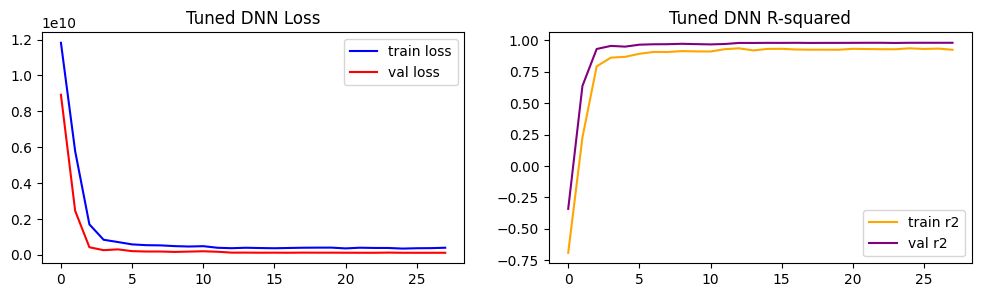

In [46]:
# Plotting training and validation loss and accuracy
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
plt.plot(tuned_hist.history['loss'], label='train loss', color= "blue")
plt.plot(tuned_hist.history['val_loss'], label='val loss', color="red")
plt.legend()
plt.title('Tuned DNN Loss')

plt.subplot(1, 2, 2)
plt.plot(tuned_hist.history['rsq'], label='train r2', color= "orange")
plt.plot(tuned_hist.history['val_rsq'], label='val r2', color= "purple")
plt.legend()
plt.title('Tuned DNN R-squared')

The model fits well, perhaps just a tiny bit of underfitting but the nonethesless the model generalizes well to the test set and validations sets.

In [89]:
##Need to define a custom object later for rsq because not native to keras model
cust = {'rsq': rsq}

##Load the best models for each
tunedpath= work_dir+'/best_tuned_model.h5'
besttuned= load_model(tunedpath, custom_objects=cust)

In [90]:
besttuned

In [91]:
##Compare performance of models
tuned_pred = besttuned.predict(Xtest_sc)
tuned_mse = mean_squared_error(y_test, tuned_pred)
tuned_rsq = r2_score(y_test, tuned_pred)

print(f'Mean Squared Error (CNN): {cnn_mse}')
print(f'Mean Squared Error (DNN): {dnn_mse}')
print(f'Mean Squared Error (RNN): {rnn_mse}')
print(f'Mean Squared Error (Tuned DNN): {tuned_mse}')
print(f'R_squared (CNN): {round(cnn_rsq,4)}')
print(f'R_squared (DNN): {round(dnn_rsq,4)}')
print(f'R_squared (RNN): {round(rnn_rsq,4)}')
print(f'R_squared (Tuned DNN): {round(tuned_rsq,4)}')

177/177 [==============================] - 0s 2ms/step
Mean Squared Error (CNN): 257149287.11623612
Mean Squared Error (DNN): 195975768.1491566
Mean Squared Error (RNN): 155900308.53059205
Mean Squared Error (Tuned DNN): 136480628.79382426
R_squared (CNN): 0.9637
R_squared (DNN): 0.9724
R_squared (RNN): 0.978
R_squared (Tuned DNN): 0.9808


Alas, we were successful at tuning and building up our DNN base model so that it became better at predicting yield from the test data than our previous base models.

## Comparison to Other Machine Learning Models

Deep Learning and Neural Networks are not the only way to tackle this model prediction task. Machine learning models such as randomforest, gradient boost and even linear gression could be powerful tools for predictive modelling depending on the objective and hand and dataset.

Let's build up the following machine learning models and compare their predictive performance to that of the deep learning models: linear regression, logistic regression, knn regression, gradient boosting regression, xgboost regression and random forest.

In [50]:
## Set the randomseed
rs= 1234

## Make a list of models
listmod = []
listmod.append(LinearRegression())
listmod.append(LogisticRegression(max_iter=125 , random_state= rs))
listmod.append(KNeighborsRegressor())
listmod.append(GradientBoostingRegressor(n_estimators=100, 
                                         learning_rate=0.1, 
                                         ##max_depth= 3, 
                                         random_state=rs))
listmod.append(XGBRegressor(random_state=rs))
listmod.append(RandomForestRegressor(random_state=rs))

# ## Loop through models and save model name and R-squared score to a pandas dataframe for plotting
rows= []

for mod in listmod:
    mod.fit(Xtrain_sc, y_train)
    y_pred = mod.predict(Xtest_sc)
    model_name = type(mod).__name__
    r2_score_value = r2_score(y_test, y_pred)
    rows.append({"model": model_name, "r2_score": round(r2_score_value, 3)})

##add row data to full dataframe
moddat= pd.DataFrame(rows)

## Display the dataframe
print(moddat)

                       model  r2_score
0           LinearRegression     0.766
1         LogisticRegression     0.702
2        KNeighborsRegressor     0.985
3  GradientBoostingRegressor     0.874
4               XGBRegressor     0.975
5      RandomForestRegressor     0.989


In [51]:
##Add deep learning results into dataframe as well to combine with machine learning model results
deep_rows= pd.DataFrame({"model": ["Conv_Neural_Net",
                                   "Deep_Neural_Net",
                                   "Recurr_Neural_Net",
                                   "HP_tuned_DNN"],
                         "r2_score": [round(cnn_rsq, 3),
                                      round(dnn_rsq, 3),
                                      round(rnn_rsq, 3),
                                      round(tuned_rsq, 3)]})
print(deep_rows)

               model  r2_score
0    Conv_Neural_Net     0.964
1    Deep_Neural_Net     0.972
2  Recurr_Neural_Net     0.978
3       HP_tuned_DNN     0.981


In [52]:
# Concatenate row-wise
combdf = pd.concat([moddat, deep_rows], axis=0)
combdf

,model,r2_score
0,LinearRegression,0.766
1,LogisticRegression,0.702
2,KNeighborsRegressor,0.985
3,GradientBoostingRegressor,0.874
4,XGBRegressor,0.975
5,RandomForestRegressor,0.989
0,Conv_Neural_Net,0.964
1,Deep_Neural_Net,0.972
2,Recurr_Neural_Net,0.978
3,HP_tuned_DNN,0.981


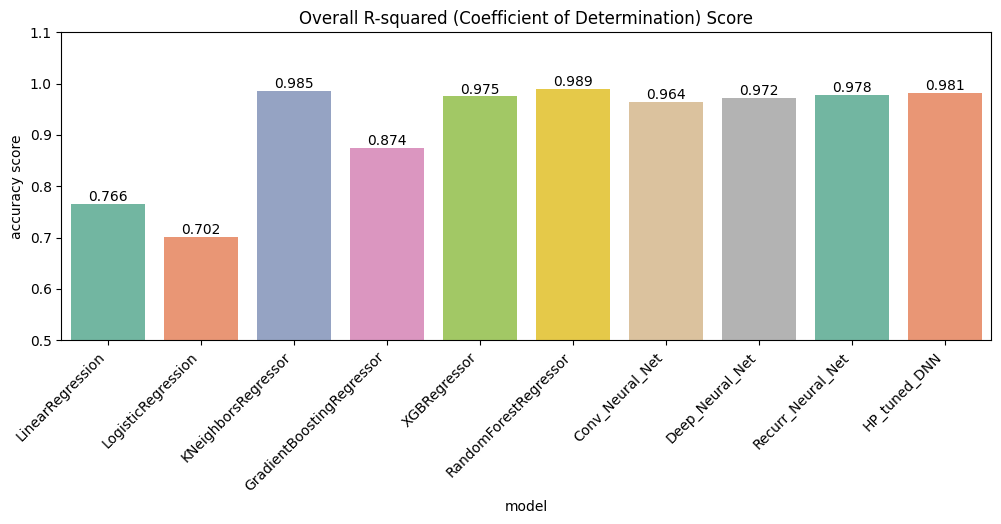

In [53]:
## Let's visualize the scores of all models. Which one is better?

plt.figure(figsize=(12, 4))

# Set color palette to "Set3"
# sns.set_palette("Set2")
r2plot = sns.barplot(x='model', 
                     y='r2_score', 
                     data= combdf,
                     errwidth=0, palette="Set2")
plt.ylim(0.5, 1.1)
plt.title("Overall R-squared (Coefficient of Determination) Score")
plt.ylabel("accuracy score")
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45, ha='right')

for i in r2plot.containers:
    r2plot.bar_label(i,)
    
plt.show()


Looking at these results, it is not surpising that both linear and logisitic regression showed the worst predictive performance on yield. This is because the relationships between the features and dependent variable were not highly or even linearly correlated as we can see from the EDA process. Random forest, the ensemble-based model, had the highest prediction performance despite not needing to tune the model very much. This is to be expected because random forests are powerful and versatile learning methods that reduces overfitting through it's many trees, making it also robust to outliers.

For our final task, we will select and plot out the linear model (one of the worst models), the random forest model (machine learning model that has the highest test prediction accuracy) and our best tuned deep learning model to see how the actual versus the predicted yield values compare.

In [54]:
linmod= LinearRegression().fit(Xtrain_sc, y_train)
lin_preds = linmod.predict(Xtest_sc)

rfmod= RandomForestRegressor(random_state=rs).fit(Xtrain_sc, y_train)
rf_preds = rfmod.predict(Xtest_sc)

In [55]:
def resplot(y_act, y_pred, pos, title):
    # Calculate R-squared
    rsq = r2_score(y_act, y_pred)

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({'Actual': y_act, 'Predicted': y_pred})

    # Create scatter plot
    sns.scatterplot(x='Actual', y='Predicted', data=plot_data,
                   ax= axs[pos])
    axs[pos].set_title(title+' Act vs Pred')
    axs[pos].set_xlabel('Actual Values')
    axs[pos].set_ylabel('Predicted Values')

   ## Best fit line and label r-squared value on top left corner
    sns.lineplot(x=[min(y_act), max(y_act)], 
                 y=[min(y_act), max(y_act)], 
                 color='red', label=f'R^2 = {rsq:.2f}',
                ax= axs[pos])
    axs[pos].legend()
    

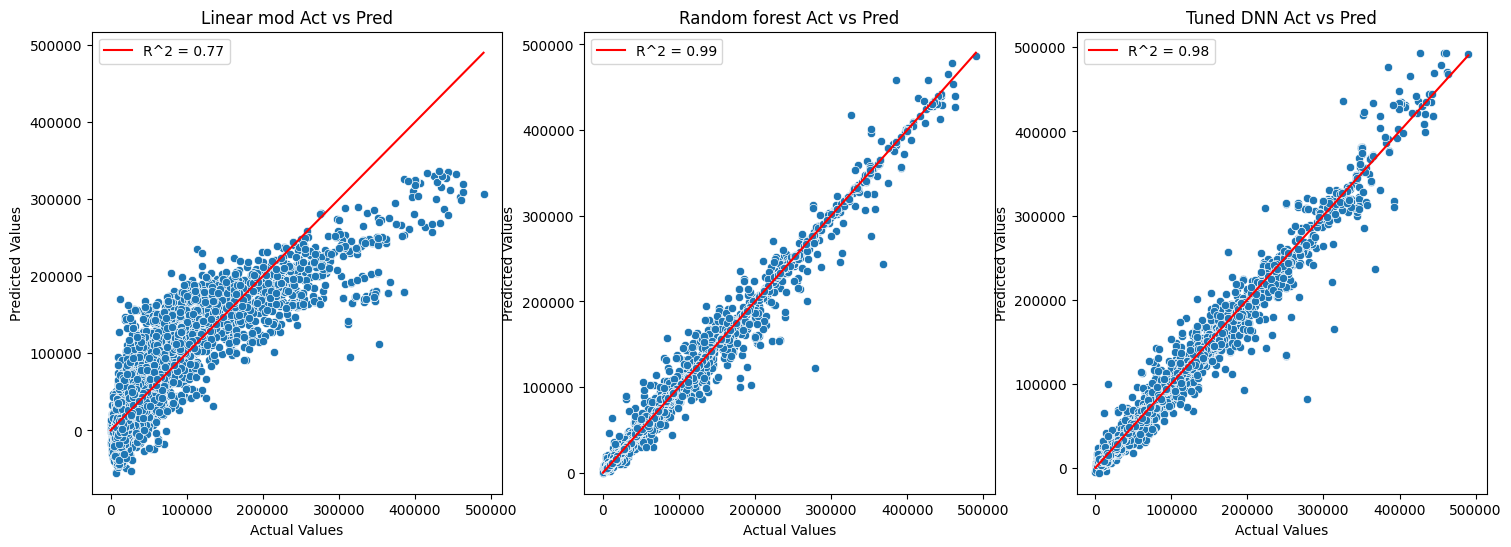

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

resplot(y_test, lin_preds, 0, "Linear mod")
resplot(y_test, rf_preds.flatten(), 1, "Random forest")
resplot(y_test, tuned_pred.flatten(), 2, 'Tuned DNN')

plt.show()

It is quite a spectacle to see how well our finely tuned model compares to an already powerful machine learning model such as the random forest. This shows that the potential of Deep Learning is even greateer than I thought for a task such as regressor prediction. These results also highlight that seemingly an ordinary task like predicting a regressor may not be so ordinary and require additional work to complete, especially when linear regression can't do the job very well. 

## Discussion/ Summary

In this project, we used Deep learning to predict yield based on vairous features from our dataset including, country location, crop type, rainfall and temperature.

The process started off with loading up python package essntials such as numpy, sckitlearn and keras and setting up our GPU environment. We then cleaned our dataset, checking the its shape and datatypes and visualizing our features in relation to our dependent variable, crop yield. We preprocessed the dataset by one-hot encoding out object (categorical) variables, split our dataset into training and testing sets and normalized/scaled the features so they are in the ready for deep learning.

Our CNN, DNN and RNN we're equally great at predicting with r-squared values for test set prediction results of 0.9637, 0.9724, and 0.978 respectively.

We chose to tune our DNN model and after discovering the best hyperparameters form our search, we built a model that was even better at predicting the unseen test set than the simpler base models (r-squared= 0.981).

Even comparing our tuned model performance to machine learning models, we've learned that it was on par with the versatile and equally powerful randomforest and much better than the simpler regression model.

Although we were able to build a prediction model using Deep Learning that had high prediction accuracy, we can furthur improve our work. Here are a few things worth exploring that may help improve model:

1. Remove outliers from our dataset
2. Select and use less features for our model
3. Use other types of encoders such as as label or ordinal encoding
4. Using other normalization or scaling techiniques such as standard scaler
5. kfolds crossvalidation (although may not be needed unless using machine learning)
6. Conduct a deeper hyperparameter search

Additionally, it could also be intriguing and valuable to delve into classifications, not just predictions for yield values. For example, specific yield values might align with particular crop types in specific locations. This insight could prove invaluable for growers in optimizing farm management practices. By analyzing the data, growers can assess whether certain pesticide levels result in diminishing returns or determine which crops thrive in specific locations. This information is crucial for identifying ideal locations, allowing growers to explore factors such as better soils, optimal seed varieties, and more effective farm management strategies.

## Final Remarks

Forecasting crop yields based on measurable attributes is crucial for several reasons. Conducting field trials is a lengthy and costly process, requiring a substantial number of trials to gain insights into potential yields for a given year. Moreover, the geographical location plays a significant role, as different areas experience varying weather and soil conditions. Deep learning and other advanced predictive modeling techniques offer a solution, enabling the accurate simulation of crop yield values. By analyzing data such as temperature, rainfall, and fertilizer inputs, these models can achieve high precision. Additionally, they can be further refined to assist businesses and organizations addressing complex challenges, such as engineering microorganisms through in-vitro and growth chamber experiments and determing how that translates to large field testing. Predictive modeling also contributes prescriptive insights for enhancing management practices. With the global population on the rise, the demand for food is increasing, making the optimization of digital farming through predictive modeling an essential strategy to address this global crisis and maximize food production worldwide.

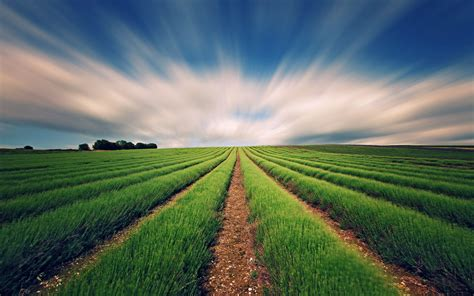

In [57]:
## Load nice field image
image_path = work_dir+"/crop_field.jpg"
img = PILImage.open(image_path)
## Display img
display(Image(filename=image_path))